In [3]:
import pandas as pd
from post_processing import violin_plots_per_iteration, violin_plots, error_estimation, merge_estimates_true, compute_val_metrics, under_over_analysis, under_over_by_method, val_metrics_per_iteration, boxplots, boxplots_per_iteration

## Upload

In [4]:
real_data_test = pd.read_csv('results/real_data_test.csv')
real_data_val = pd.read_csv('results/real_data_val.csv')
syn_data_test = pd.read_csv('results/syn_data_test.csv')
syn_data_val = pd.read_csv('results/syn_data_val.csv')
stats = pd.read_csv('results/time_series_stats.csv')

# Analysing Results

In [5]:
data_val, data_test = real_data_val, real_data_test

## Tables

In [6]:
est_data_val = error_estimation(data_val)

In [7]:
estimates = merge_estimates_true(est_data_val, data_test)
all_metrics = compute_val_metrics(estimates, 'mse')

0        True
1       False
2       False
3       False
4       False
        ...  
8762    False
8763    False
8764    False
8765    False
8766    False
Length: 8767, dtype: bool
ARMA Adapted hv-Block CV
0       False
1        True
2       False
3       False
4       False
        ...  
8762    False
8763    False
8764    False
8765    False
8766    False
Length: 8767, dtype: bool
LSTM Adapted hv-Block CV
0       False
1       False
2        True
3       False
4       False
        ...  
8762    False
8763    False
8764    False
8765    False
8766    False
Length: 8767, dtype: bool
Tree Adapted hv-Block CV
0       False
1       False
2       False
3        True
4       False
        ...  
8762    False
8763    False
8764    False
8765    False
8766    False
Length: 8767, dtype: bool
ARMA Block CV
0       False
1       False
2       False
3       False
4        True
        ...  
8762    False
8763    False
8764    False
8765    False
8766    False
Length: 8767, dtype: bool
LSTM Block 

In [8]:
under_over_analysis(estimates, 'mse')[0]

,Mean,Median,1st_Quartile,3rd_Quartile,Minimum,Maximum,Standard_deviation,N,%,method,model,metric
0,-2.187230e+05,-9.567709,-208.844791,-0.042103,-1.144028e+07,-4.099003e-08,1.403351e+06,134,50.00,Adapted hv-Block CV,ARMA,PAE
1,2.187230e+05,9.567709,0.042103,208.844791,4.099003e-08,1.144028e+07,1.403351e+06,134,50.00,Adapted hv-Block CV,ARMA,APAE
2,-2.915440e-01,-0.218193,-0.419208,-0.083621,-9.998897e-01,-2.307294e-03,2.575039e-01,134,50.00,Adapted hv-Block CV,ARMA,RPAE
3,2.915440e-01,0.218193,0.083621,0.419208,2.307294e-03,9.998897e-01,2.575039e-01,134,50.00,Adapted hv-Block CV,ARMA,RAPAE
4,-1.934537e+06,-2.867998,-239.758655,-0.000997,-1.037862e+08,-1.328432e-08,1.393592e+07,106,40.61,Adapted hv-Block CV,LSTM,PAE
...,...,...,...,...,...,...,...,...,...,...,...,...
127,3.625344e-01,0.259063,0.104680,0.538526,1.282913e-02,9.909616e-01,2.880008e-01,63,24.14,Weighted Rolling Window,LSTM,RAPAE
128,-1.119252e+04,-3.272943,-41.582172,-0.027188,-6.238061e+05,-5.523761e-09,6.905951e+04,99,36.94,Weighted Rolling Window,Tree,PAE
129,1.119252e+04,3.272943,0.027188,41.582172,5.523761e-09,6.238061e+05,6.905951e+04,99,36.94,Weighted Rolling Window,Tree,APAE
130,-2.493555e-01,-0.153635,-0.353472,-0.048011,-9.999716e-01,-9.662739e-04,2.742890e-01,99,36.94,Weighted Rolling Window,Tree,RPAE


In [9]:
under_over_by_method(estimates, 'mse')

(             Mean    Median  ...                   method  metric
 0  -633335.935114 -4.628091  ...      Adapted hv-Block CV     PAE
 1   633335.935114  4.628091  ...      Adapted hv-Block CV    APAE
 2       -0.319392 -0.243868  ...      Adapted hv-Block CV    RPAE
 3        0.319392  0.243868  ...      Adapted hv-Block CV   RAPAE
 4  -637193.793873 -6.403346  ...                 Block CV     PAE
 5   637193.793873  6.403346  ...                 Block CV    APAE
 6       -0.317065 -0.244091  ...                 Block CV    RPAE
 7        0.317065  0.244091  ...                 Block CV   RAPAE
 8  -423870.190881 -2.360121  ...           Growing Window     PAE
 9   423870.190881  2.360121  ...           Growing Window    APAE
 10      -0.288094 -0.192071  ...           Growing Window    RPAE
 11       0.288094  0.192071  ...           Growing Window   RAPAE
 12 -142240.144298 -2.956666  ...                  Holdout     PAE
 13  142240.144298  2.956666  ...                  Holdout    

In [10]:
iteration_data = pd.merge(left=data_val, right=data_test, on=["model", "series"], suffixes=["_estimate", "_true"]);

In [11]:
metrics = val_metrics_per_iteration(iteration_data, 'mse', methods_list=['Weighted Block CV var.2', 'Block CV'])
metrics

method model  ...         RAPAE              
                                   ...           max           std
0                  Block CV  ARMA  ...  7.484983e+01      6.676526
1                  Block CV  ARMA  ...  2.285743e+01      2.083134
2                  Block CV  ARMA  ...  3.155692e+01      2.672114
3                  Block CV  ARMA  ...  5.402977e+01      4.371586
4                  Block CV  ARMA  ...  5.080857e+01      5.050775
5                  Block CV  LSTM  ...  4.204169e+02     34.097837
6                  Block CV  LSTM  ...  1.192340e+02      8.196078
7                  Block CV  LSTM  ...  1.766063e+03    133.139205
8                  Block CV  LSTM  ...  3.190035e+02     23.034372
9                  Block CV  LSTM  ...  7.805306e+02     48.445321
10                 Block CV  Tree  ...  2.895870e+02     25.711673
11                 Block CV  Tree  ...  1.354201e+06  82720.914683
12                 Block CV  Tree  ...  9.570389e+02     92.753740
13                 Block CV  Tree  ...  1.354201e+06  82720.857181
14                 Block CV  Tree  ...  4.684521e+01      4.530463
15  Weighted Block CV var.2  ARMA  ...  2.285743e+01      2.083134
16  Weighted Block CV var.2  ARMA  ...  3.155692e+01      2.672114
17  Weighted Block CV var.2  ARMA  ...  5.402977e+01      4.371586
18  Weighted Block CV var.2  ARMA  ...  5.080857e+01      5.050775
19  Weighted Block CV var.2  LSTM  ...  1.192340e+02      8.196078
20  Weighted Block CV var.2  LSTM  ...  1.766063e+03    133.139205
21  Weighted Block CV var.2  LSTM  ...  3.190035e+02     23.034372
22  Weighted Block CV var.2  LSTM  ...  7.805306e+02     48.445321
23  Weighted Block CV var.2  Tree  ...  1.354201e+06  82720.914683
24  Weighted Block CV var.2  Tree  ...  9.570389e+02     92.753740
25  Weighted Block CV var.2  Tree  ...  1.354201e+06  82720.857181
26  Weighted Block CV var.2  Tree  ...  4.684521e+01      4.530463

[27 rows x 23 columns]

## Graphs

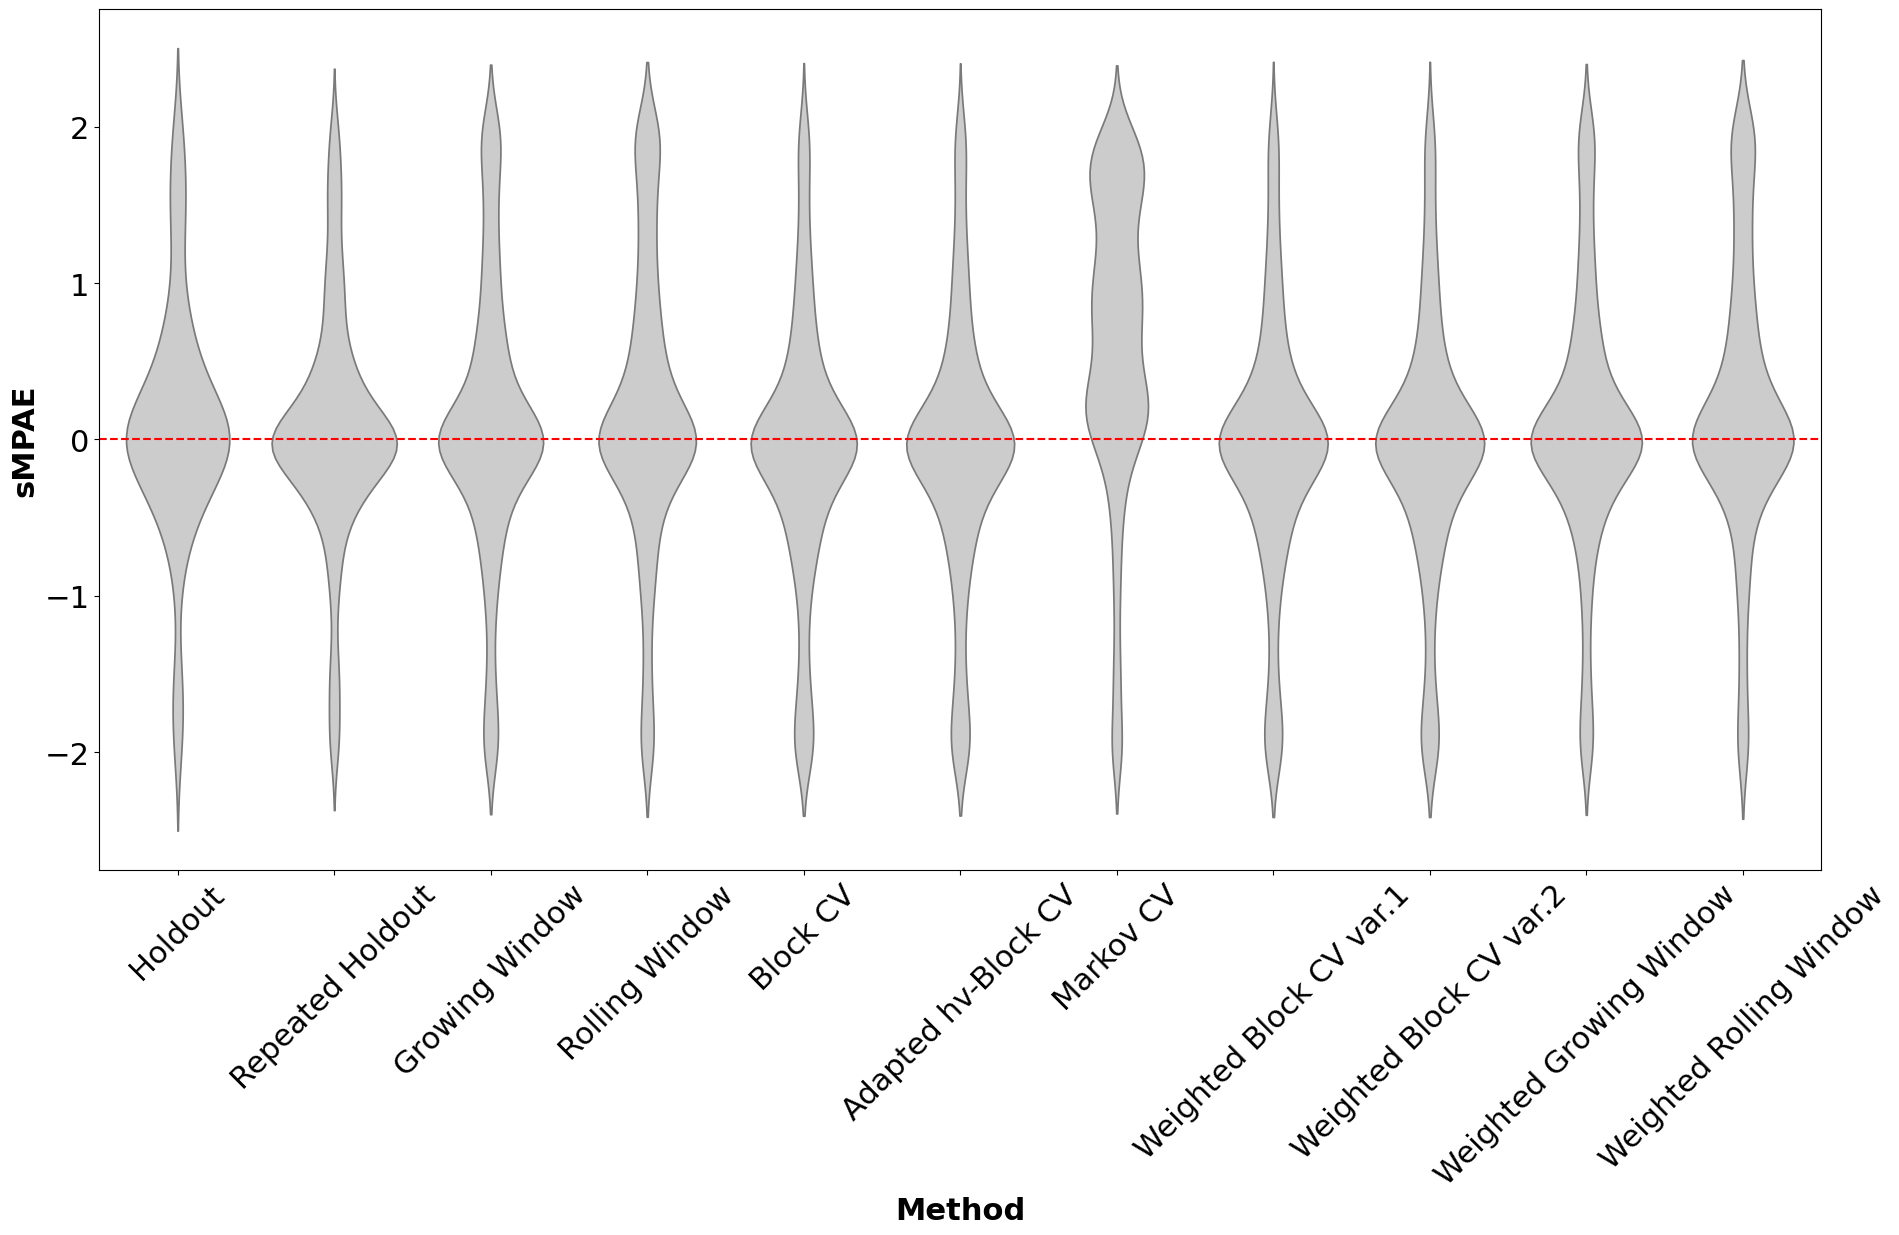

In [12]:
methods = ['Holdout']
it = iteration_data.loc[iteration_data["method"].isin(methods)].copy()
violin_plots(iteration_data, "mse", "Tree", ["sMPAE"], 10, 20)

In [13]:
methods = ['Block CV', 'Weighted Block CV var.1']
it = iteration_data.loc[iteration_data["method"].isin(methods)].copy()
it

,series,Field_estimate,method,iteration,model,mse_estimate,mae_estimate,rmse_estimate,weights,Field_true,mse_true,mae_true,rmse_true
38,covid19_0,saude,Block CV,0,Tree,25.500000,4.100000,5.049752,1.0000,saude,17.316252,2.493517,4.161280
39,covid19_0,saude,Block CV,0,ARMA,36.902909,5.593245,6.074776,1.0000,saude,35.113134,5.037637,5.925634
40,covid19_0,saude,Block CV,1,Tree,127.334402,7.414103,11.284255,1.0000,saude,17.316252,2.493517,4.161280
41,covid19_0,saude,Block CV,1,ARMA,153.787160,9.407495,12.401095,1.0000,saude,35.113134,5.037637,5.925634
42,covid19_0,saude,Block CV,2,Tree,79.861538,6.384615,8.936528,1.0000,saude,17.316252,2.493517,4.161280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34230,jena_climate_data_5,meteorologia,Weighted Block CV var.1,4,LSTM,0.057558,0.136813,0.239913,0.2500,meteorologia,0.091031,0.155307,0.301713
34231,jena_climate_data_6,meteorologia,Weighted Block CV var.1,1,LSTM,0.021890,0.088190,0.147953,0.0625,meteorologia,0.022338,0.088699,0.149459
34232,jena_climate_data_6,meteorologia,Weighted Block CV var.1,2,LSTM,0.022596,0.092654,0.150321,0.0625,meteorologia,0.022338,0.088699,0.149459
34233,jena_climate_data_6,meteorologia,Weighted Block CV var.1,3,LSTM,0.020107,0.075713,0.141800,0.1250,meteorologia,0.022338,0.088699,0.149459


c:\Users\User\Desktop\Project_repos\tsvalidation\tsvalidation\experiments\post_processing.py:350: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = boxplot[0].get_figure() if isinstance(boxplot, pd.Series) else boxplot[0, 0].get_figure()


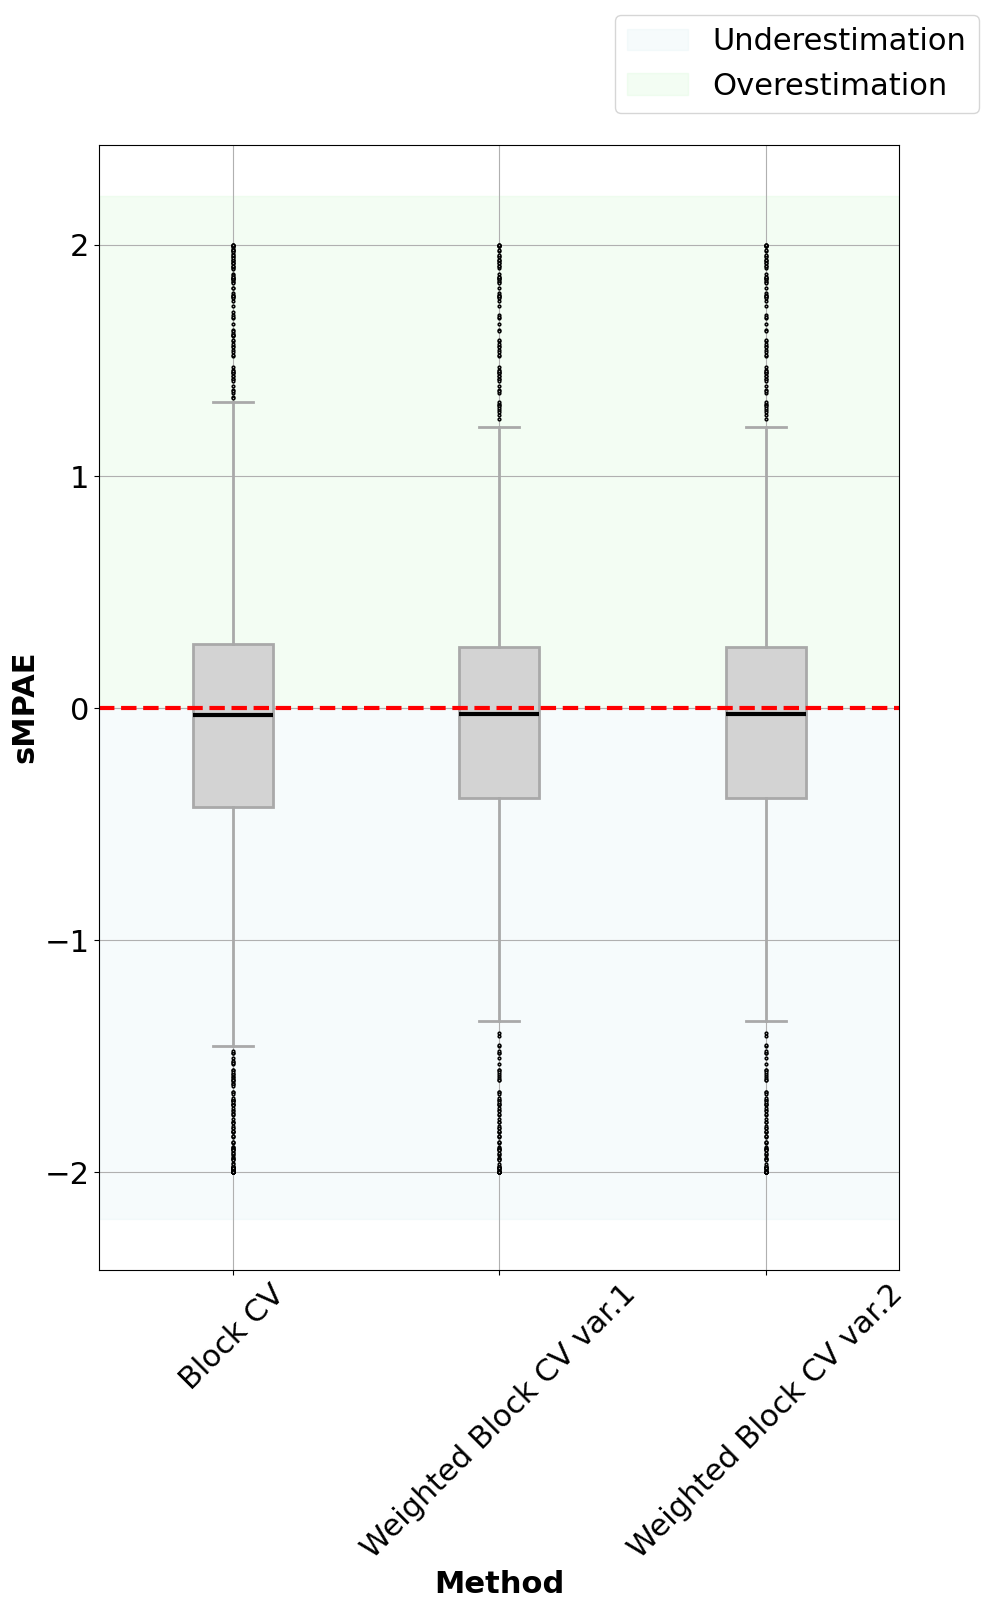

In [14]:
methods = ['Block CV', 'Weighted Block CV var.1', 'Weighted Block CV var.2']
it = iteration_data.loc[iteration_data["method"].isin(methods)].copy()
boxplots(it, "mse", "Tree", ["sMPAE"], 15, 10, shows_outliers=True)

In [15]:
iteration_data.method.unique()
iteration_data.loc[iteration_data["method"].isin(methods)].copy()

,series,Field_estimate,method,iteration,model,mse_estimate,mae_estimate,rmse_estimate,weights,Field_true,mse_true,mae_true,rmse_true
38,covid19_0,saude,Block CV,0,Tree,25.500000,4.100000,5.049752,1.000000,saude,17.316252,2.493517,4.161280
39,covid19_0,saude,Block CV,0,ARMA,36.902909,5.593245,6.074776,1.000000,saude,35.113134,5.037637,5.925634
40,covid19_0,saude,Block CV,1,Tree,127.334402,7.414103,11.284255,1.000000,saude,17.316252,2.493517,4.161280
41,covid19_0,saude,Block CV,1,ARMA,153.787160,9.407495,12.401095,1.000000,saude,35.113134,5.037637,5.925634
42,covid19_0,saude,Block CV,2,Tree,79.861538,6.384615,8.936528,1.000000,saude,17.316252,2.493517,4.161280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37418,jena_climate_data_5,meteorologia,Weighted Block CV var.2,4,LSTM,0.057558,0.136813,0.239913,0.258065,meteorologia,0.091031,0.155307,0.301713
37419,jena_climate_data_6,meteorologia,Weighted Block CV var.2,1,LSTM,0.021890,0.088190,0.147953,0.032258,meteorologia,0.022338,0.088699,0.149459
37420,jena_climate_data_6,meteorologia,Weighted Block CV var.2,2,LSTM,0.022596,0.092654,0.150321,0.064516,meteorologia,0.022338,0.088699,0.149459
37421,jena_climate_data_6,meteorologia,Weighted Block CV var.2,3,LSTM,0.020107,0.075713,0.141800,0.129032,meteorologia,0.022338,0.088699,0.149459


c:\Users\User\Desktop\Project_repos\tsvalidation\tsvalidation\experiments\post_processing.py:350: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = boxplot[0].get_figure() if isinstance(boxplot, pd.Series) else boxplot[0, 0].get_figure()


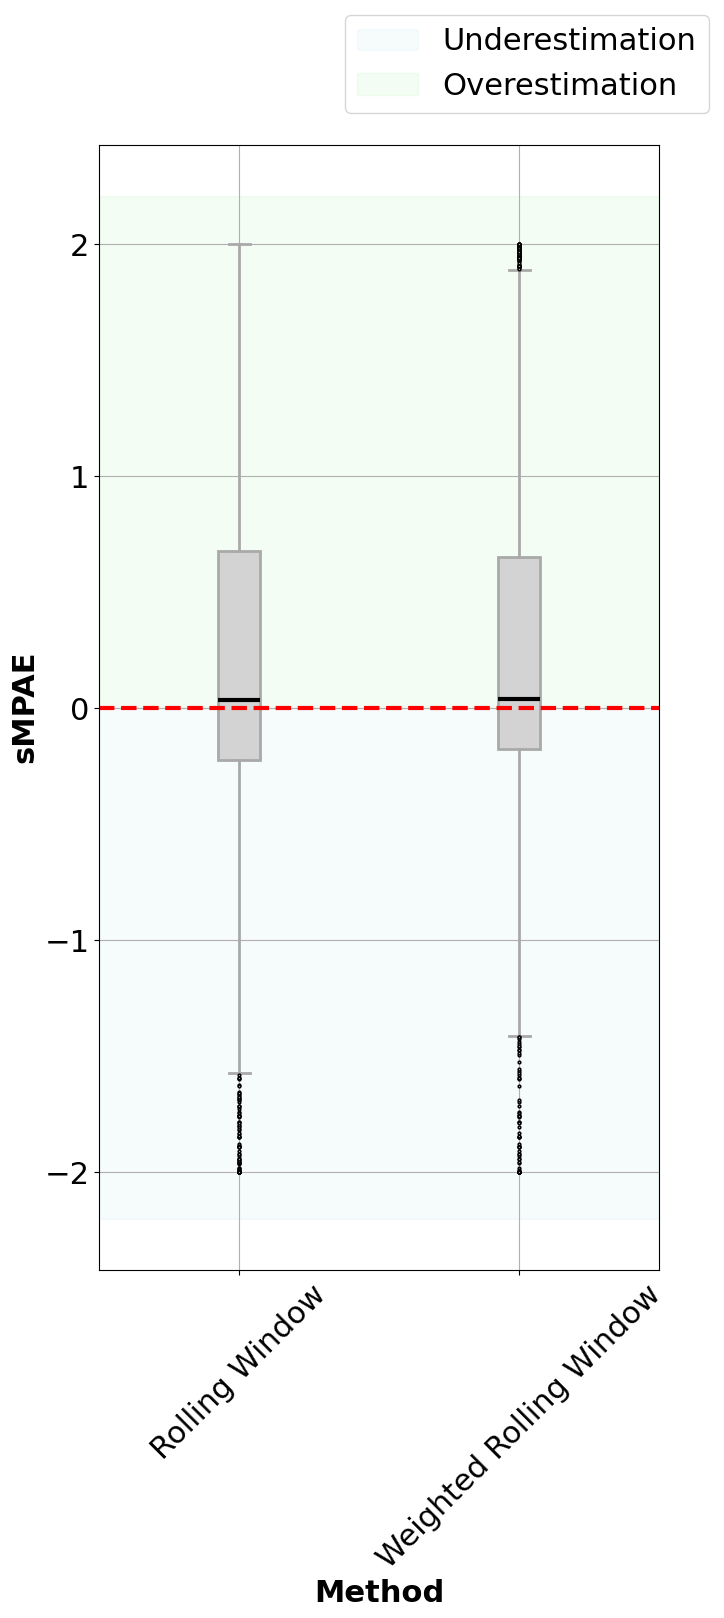

In [16]:
methods = ['Rolling Window','Weighted Rolling Window']
it = iteration_data.loc[iteration_data["method"].isin(methods)].copy()
boxplots(it, "mse", "Tree", ["sMPAE"], 15, 7, shows_outliers=True)

##### Main Boxplots

c:\Users\User\Desktop\Project_repos\tsvalidation\tsvalidation\experiments\post_processing.py:350: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = boxplot[0].get_figure() if isinstance(boxplot, pd.Series) else boxplot[0, 0].get_figure()


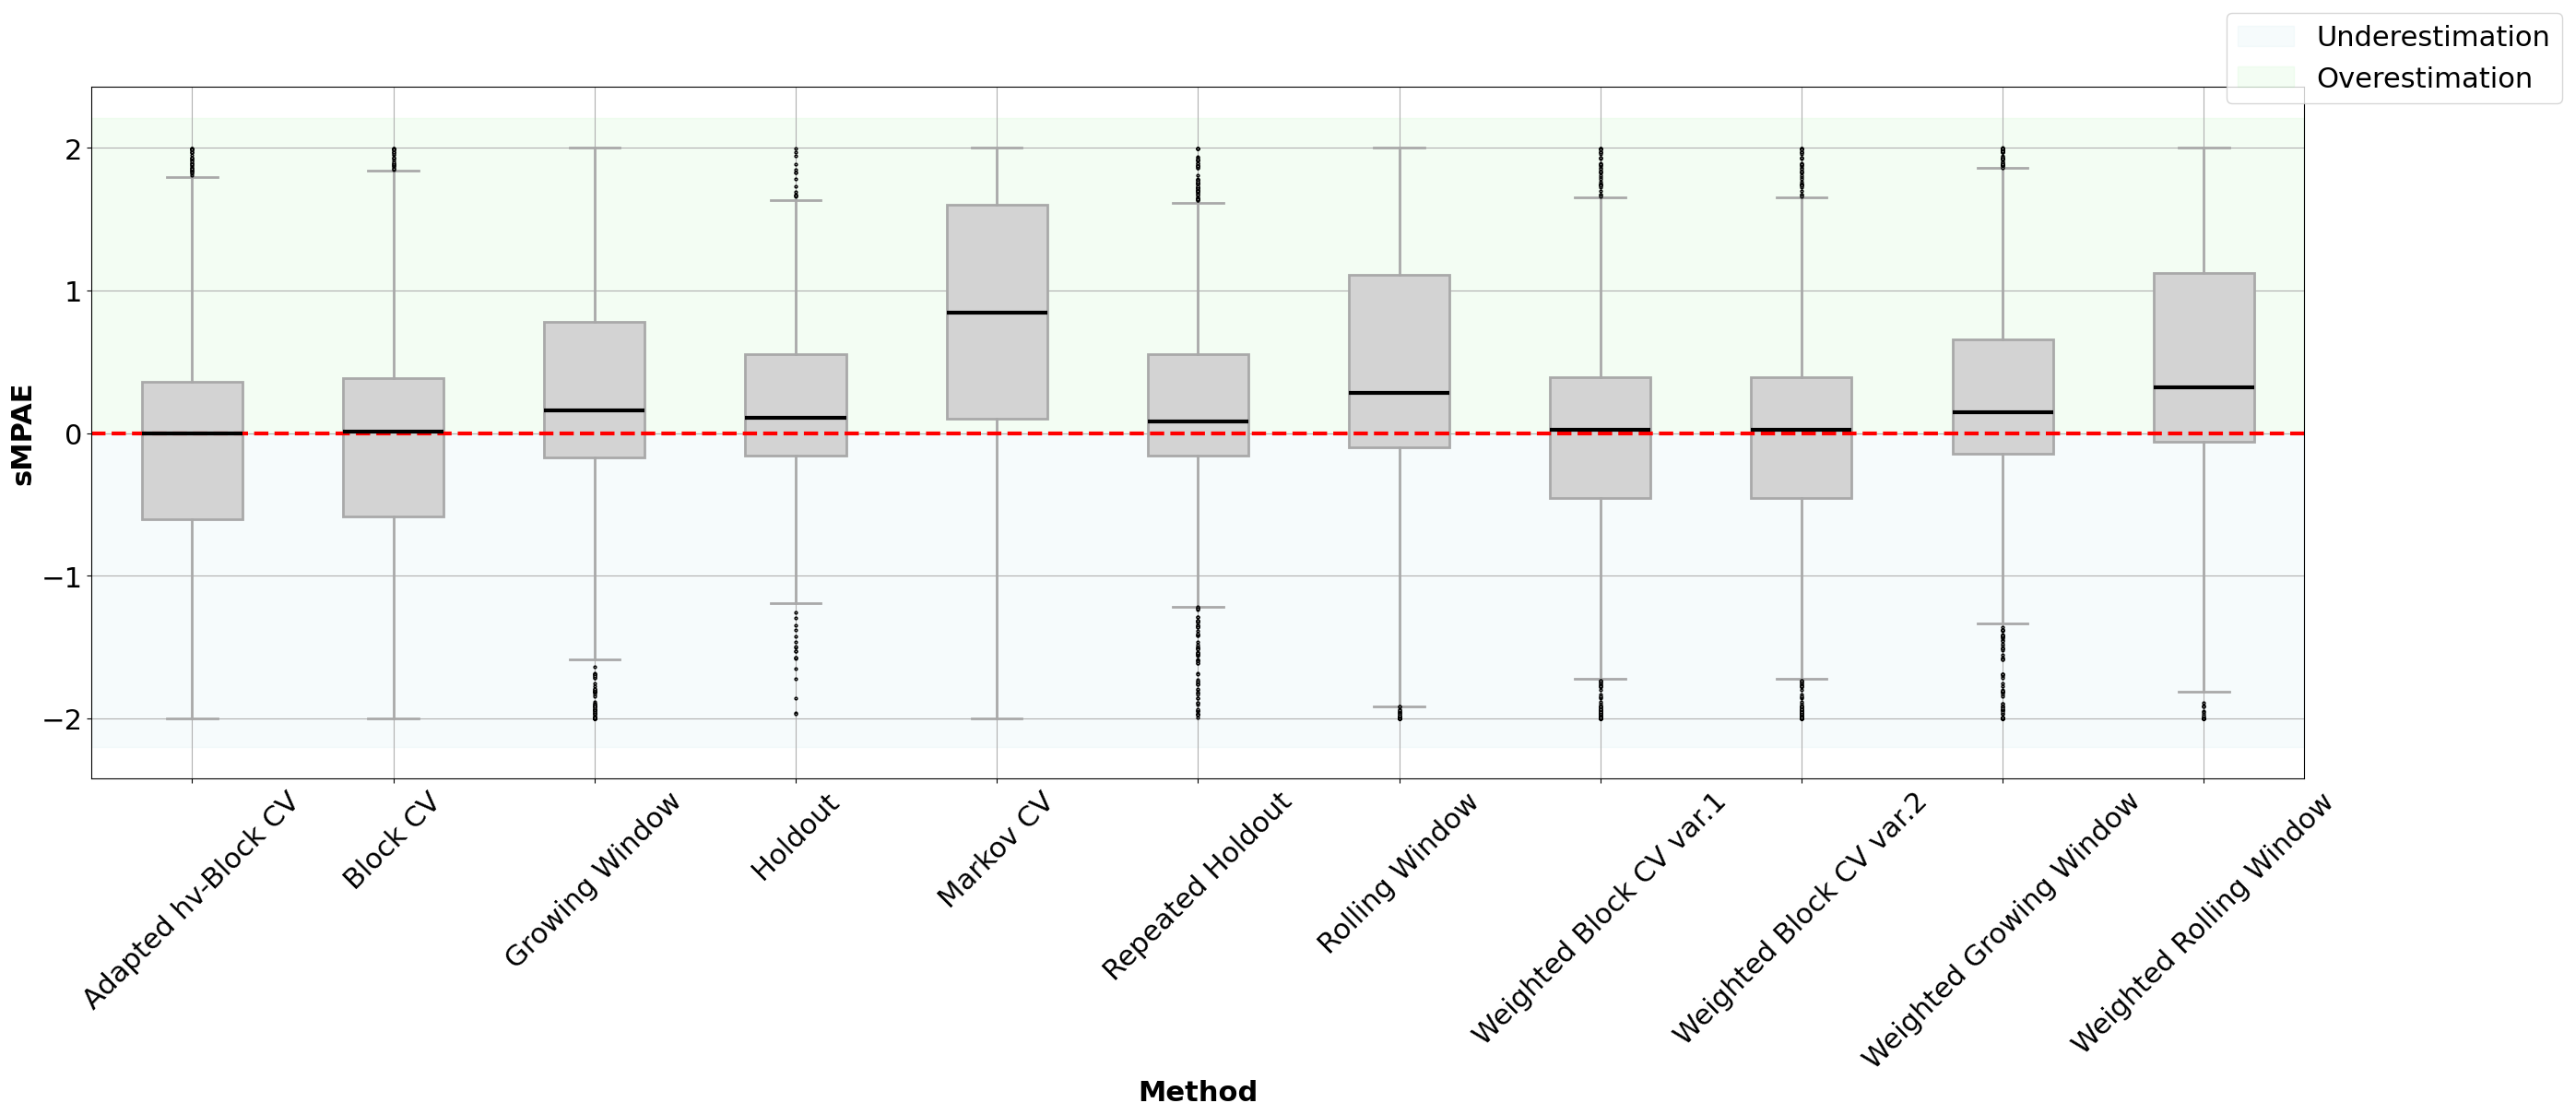

In [17]:
methods = ['Holdout', 'Repeated Holdout']
it = iteration_data.loc[iteration_data["method"].isin(methods)].copy()
boxplots(iteration_data, "mse", "LSTM", ["sMPAE"], 10, 30, shows_outliers=True)

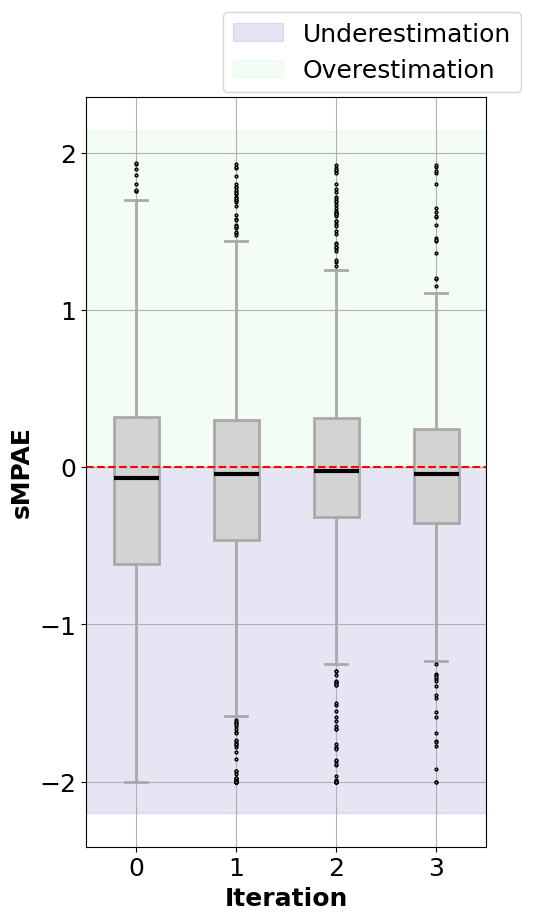

In [18]:
boxplots_per_iteration(iteration_data, "mse", "ARMA", "Growing Window", ["sMPAE"], 10, 5);

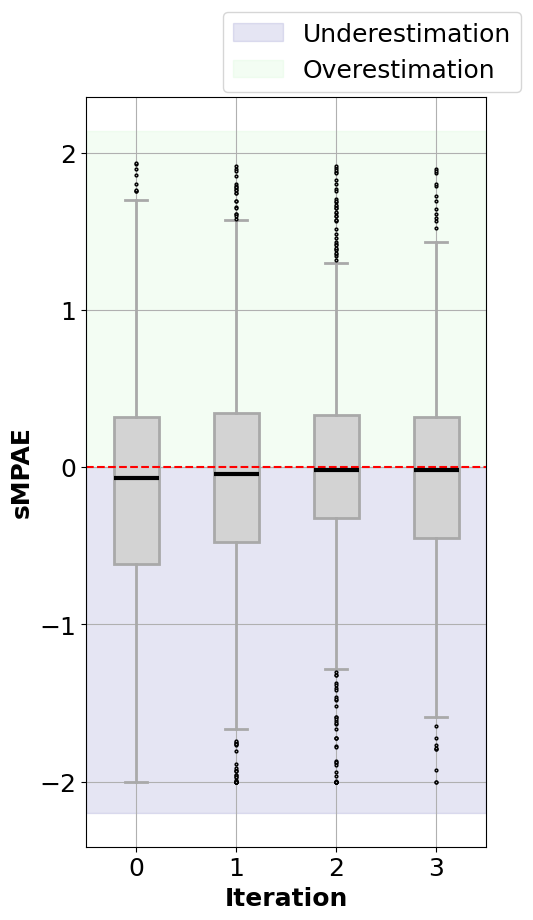

In [19]:
boxplots_per_iteration(iteration_data, "mse", "ARMA", "Rolling Window", ["sMPAE"], 10, 5);

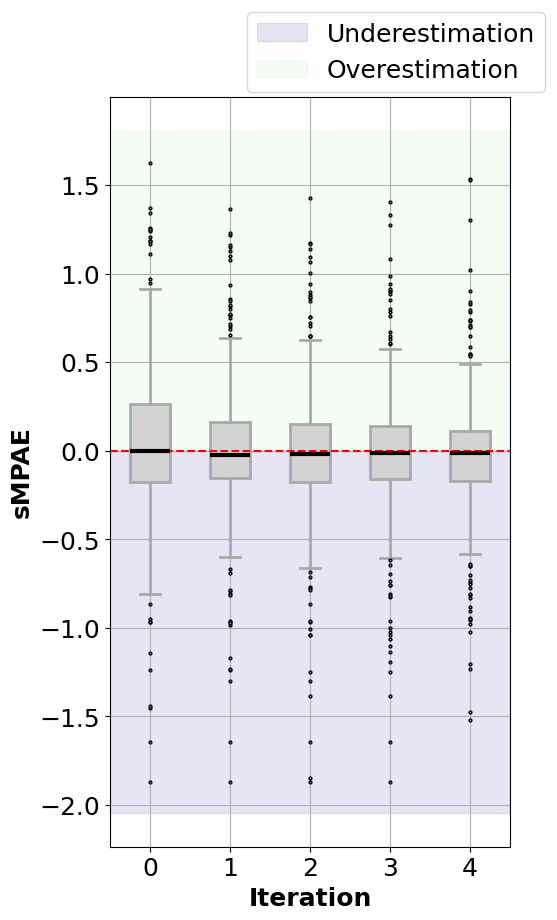

In [20]:
boxplots_per_iteration(iteration_data, "mae", "ARMA", "Block CV", ["sMPAE"], 10, 5);

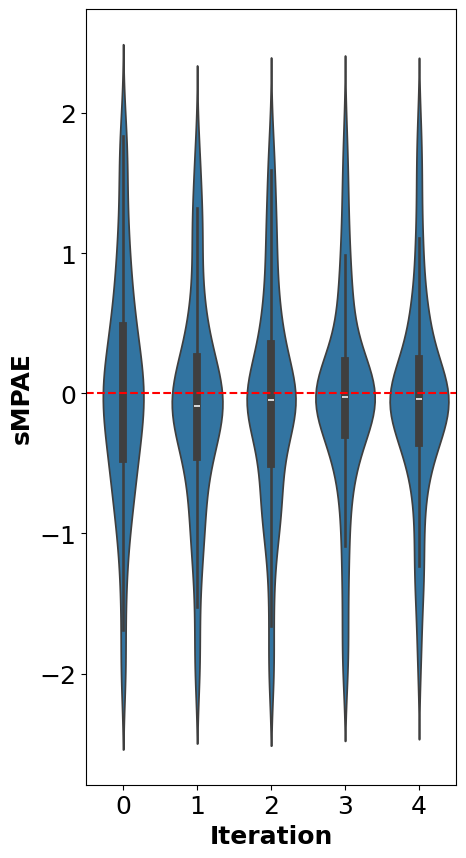

In [21]:
violin_plots_per_iteration(iteration_data, "mse", "ARMA", "Block CV", ["sMPAE"], 10, 5);